##  Final project : Epidemiological Modelling##

        Asfia Hossoin    


### Introduction ###

The aim of the project is to explore the dynamics of an infectious disease over time using the SIR and SEIR model.Both models consist of coupled non-linear differential equations which will be solved using the solve_ivp and odeint built in python function where appropriate.Both solve_ivp and odeint are ODE solvers, the main difference is: solve_ivp allows the user to choose the type of integrator for example, the Runge kutta or BDF (backward differentiation formula) method whereas the odeint uses Isoda from FORTRAN package to solve the ODEs [6]. I will be making some unrealistic assumptions which will be oulined below to make the SIR model less complicated.

### Assumptions for the model ###
1. Initially everybody is susceptible to infection
3. Once infected,everybody will recover and be immune for life (i.e. can not get infected twice)
4. The population of the area being modelled remains constant and closed meaning no emigration,immigration,births or deaths

In [1]:
import numpy as np
from matplotlib.pyplot import plot, xlabel, ylabel, grid, legend,loglog,figure,subplot,title
from scipy.integrate import solve_ivp,odeint
%matplotlib notebook

In the following cell, I will be solving the first order ODEs. They represent the dreivative of susceptible, infectious and recovered cases all with respect to time. 

$$
\begin{align}
\dot{S} & = \frac{-\beta I S }{\mathrm N} \\
\dot{I} & = \frac{ \beta I S }{\mathrm N} -\gamma I \\
\dot{R} & =  \gamma I\\
\end{align}
$$


Where: 
- $ \ S $: Susceptible population
- $ \ I $: Infectious population
- $ \ R $: Recovered population
- $ \beta $: Infection rate
- $ \gamma $: Recovery rate

In [2]:
B = 0.5 # the infection rate
Y = 0.2   # the recovery rate
N = 1001  #total populatin

def derivative_model(t,x):
    S,I,R = x
    dS_dt = ((-B*I*S) / N )
    dI_dt = (B*I*S)/(N) - Y*I
    dR_dt = Y*I
    # returns the derivative of [S,I,R] 
    return np.array((dS_dt,dI_dt,dR_dt))

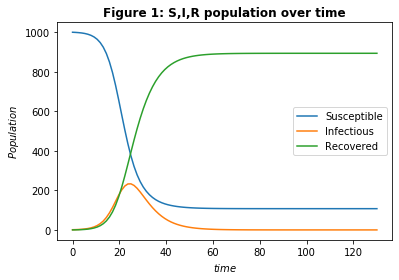

In [3]:
figure()
solution = solve_ivp(derivative_model,(0,365),(1000,1,0),t_eval=np.linspace(0,130,100))
s,i,r = solution.y
time = solution.t

#print(s[len(s)-1])
#print(r[len(r)-1])

title('Figure 1: S,I,R population over time',fontweight="bold")
plot()
plot(time, s, label = 'Susceptible') #susceptible population Vs time
plot(time, i, label = 'Infectious')  #infectious population Vs time
plot(time, r, label = 'Recovered')   #recovered population vs time
xlabel('$time$')
ylabel('$Population$')
legend()

The condition for an epidemic to occur is: $\dot{I}$ > 0. Also, as initially, it was assumed everybody is susceptible to being infected, the total population must therefore be approximately eqaul to the susceptible popution (N $\approx$ S). So, that gives me $\dot{I}$=I($\beta -\gamma$)>0 leading to $\frac\beta \gamma$>1 where $\frac\beta \gamma$ = $\ r_0$ = basic reproduction number [3]. This means if $\ r_0$ is 3 then on average 3 healthy people are being infected by an infectious person.This means if $\ r_0$ < 1, the epidemic will not occur.Hence, the goal is to reduce the value of $\ r_0$ which can be done by implementing social distancing or lockdown.

Note: $\ r_0$ not to be confused with the intitial condition for recovery which is denoted by $\ R_0$

The following code keeps the recovery rate parameter constant and varies the infection rate to see the effect on infected population. The infection rate parameter represents the effect of lockdown and will be varied between 0.2 to 0.5.

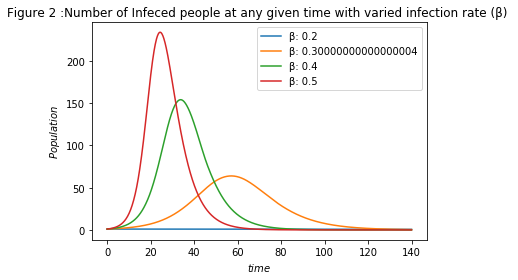

In [4]:
figure()
infected = []
max_infected=[]
beta_val = []


for j in range(2,6):
    B = (10**-1)*j #beta between 0.2 to 0.5
    beta_val.append(B)
    
    solution1 = solve_ivp(derivative_model,(0,365),(1000,1,0),t_eval=np.linspace(0,140,1000))
      
    infected.append(solution1.y[1])
    max_infected.append(np.max(solution1.y[1])) ## finds the maximum infected 
    
    title('Figure 2 :Number of Infeced people at any given time with varied infection rate (\u03B2) ')
    #plot(solution1.t,solution1.y[0])
    plot(solution1.t,solution1.y[1],label='\u03B2: {0}'.format(B))                             
    #plot(solution1.t,solution1.y[2],'--') 
    
#print(max_infected)  
xlabel('$time$')
ylabel('$Population$')
legend()


My SIR model makes some strong assumptions which is impractical but just out of curiosity I want to see how the SIR model will fit onto original data.
It is said that COVID-19 has basic reproduction rate between 0.5 and 0.9 in the UK currently in May [7].In march it was between 2 to 2.5. To see how close to this value SIR model prediction gets, I am going to fit the original COVID-19 data I have obtained from google [5] using curve_fit. Once I have found a suitable set of parameters that fit the data well, I can calcuate $\ r_0$ from that by rearranging the equation $\ r_0$=$\beta/\gamma$.

β: 0.10704388373120503
γ: 0.3009674015644128
The reporoduction number is: 0.35566603949396686
Percentage error: 28.866792101206627 %


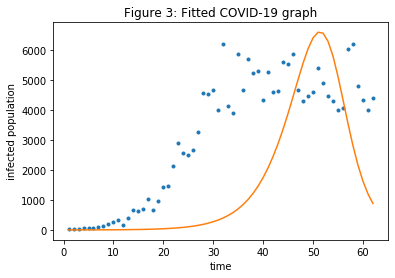

In [5]:
#COVID-19 is still ongoing and I have used 62 days worth of data starting from 5th March till 5th May ,
#changing the initial population to 6032 to scale the SIR graph to the Uk cases

from scipy.optimize import curve_fit
figure()
#these are Uk's total infected cases each day
infected_cases=[29,46,46,65,50,52,83,134,207,264,330,152,407,676,643,714,1035,665,967,1427,1452,2129,2890,
                2556,2502,2665,3250,4567,4522,4672,4000,6199,4143,3888,5865,4675,5706,5233,5288,4342,5252,
                4603,4617,5599,5525,5850,4676,4301,4451,4583,5386,4913,4463,4309,3996,4076,6032,6201,4806,
                4339,3985,4406]

data_x=[] # 62 days
for f in range(1,63):
    data_x.append(f)

plot(data_x,infected_cases,'.',label = 'infected cases in the UK') ##plot of the original data

##setting up the function for curve_fit
def parameter_fit(t,B,Y):
    def deriv(x,t):
        S,I,R = x
        dS_dt = ((-B*I*S) / (6032))
        dI_dt = ((B*I*S)/(6032)) - Y*I
        dR_dt = Y*I 
        return np.array((dS_dt,dI_dt,dR_dt))

    solutions = odeint(deriv, (6031,1,0), t)
    return solutions[:,1]


popt,cov=curve_fit(parameter_fit,data_x,infected_cases,p0=(0.5,0.2))

##printing best fit parameters
print('\u03B2:',abs(popt[0]))
print(u"\u03B3:",abs(popt[1]))

title('Figure 3: Fitted COVID-19 graph')
plot(data_x,parameter_fit(data_x,*popt))
xlabel('time')
ylabel('infected population')

##calculating r_0 value
r_0 = popt[0]/popt[1]
print('The reporoduction number is:',r_0)

##I will be optimistic and take the minimum value of r_0 calculated by the experts which is between 0.5 and 0.9
#to calculate the percentage difference
print('Percentage error:',(abs(r_0-0.5)/0.5)*100,'%') 

### Introducing the SEIR model ###

An extra stage called "exposure" has been added to the SIR model to observe the impact on population.Another set of differential equations that includes the exposure stage now needs to solved.In the exposed stage people carry the disease but are not infectious.The initial conditons are: $S_0$ = 1000, $E_0$ = 1, $I_0$ = 0, $R_0$ = 0.      

$$
\begin{align}
\dot{S} & = \frac{-\beta I S }{\mathrm N} \\
\dot{E} & = \frac{ \beta I S }{\mathrm N} -\sigma E\\
\dot{I} & =  \sigma E -\gamma I \\
\dot{R} & =  \gamma I\\
\end{align}
$$


Where: 
- $ \ S $: Susceptible population
- $ \ I $: Infectious population
- $ \ R $: Recovered population
- $ \beta $: Infection rate
- $ \gamma $: Recovery rate
- $ \sigma $: Incubation rate


##### Assumptions: ####   
Same as SIR model and everybody who is exposed will get infected.


In [6]:
B = 0.5     # the infection rate
Y = 0.2     # the recovery rate
N = 1001    #total populatin
sigma = 1/5 #incubation rate, 5 is the number of days for the exposure
def derivative_SEIR(t,x):
    S,E,I,R = x
    dS_dt = ((-B*I*S) / N )
    dE_dt = (B*I*S)/(N) - (sigma*E)
    dI_dt = (sigma*E) - (Y*I)
    dR_dt = Y*I
    # returns the derivative of [S,E,I,R] 
    return np.array((dS_dt,dE_dt,dI_dt,dR_dt))

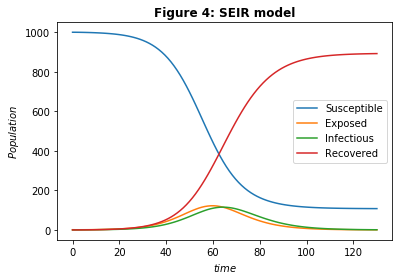

In [7]:
sol = solve_ivp(derivative_SEIR,(0,365),(1000,1,0,0),t_eval=np.linspace(0,130,100))
s1,e,i1,r1 = sol.y
time1 = sol.t

figure()
title('Figure 4: SEIR model',fontweight='bold')
plot(time1, s1, label = 'Susceptible') #susceptible population Vs time
plot(time1, e,  label='Exposed')       #Exposed population vs time
plot(time1, i1,label = 'Infectious')  #infectious population Vs time
plot(time1, r1,label = 'Recovered')   #recovered population vs time
xlabel('$time$')
ylabel('$Population$')
legend()

$\beta$ and $\gamma$ are going to remain constant and only $\sigma$ will be varied to see the effect on population.
Assumption:
The incubation period is between 3 to 5 days, after that the person becomes infectious.


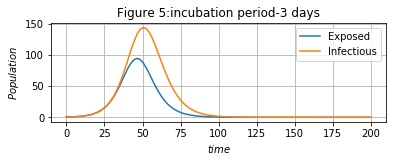

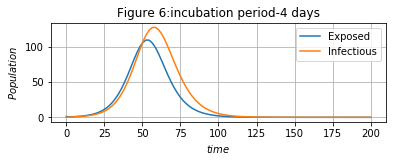

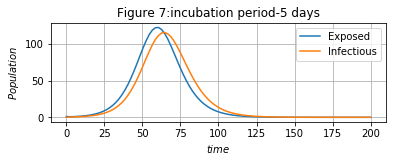

In [8]:
B = 0.5 
Y = 0.2 
N = 1001

for days in range (3,6):
    sigma = 1/days 
    sol1 = solve_ivp(derivative_SEIR,(0,365),(1000,1,0,0),t_eval=np.linspace(0,200,100))
    s2,e1,i2,r2 = sol1.y
    time2 = sol1.t
    #print(np.min(s2))
    #print(np.max(r2))
    
    figure()
    
    subplot(2,1,1)
    title('Figure {0}:incubation period-{1} days'.format(days+2,days))
    #plot(time2, s2, label = 'Susceptible') #susceptible population Vs time
    plot(time2, e1, label='Exposed')       #Exposed population vs time
    plot(time2, i2, label = 'Infectious')  #infectious population Vs time
    #plot(time2, r2, label = 'Recovered')   #recovered population vs time
    xlabel('$time$')
    ylabel('$Population$')
    grid()
    legend()




Modelling two different diseases to see if there is a common set of parameteres up to a certain point in time. Total population is 6032. The parameters ($\beta$ and $\gamma$) obtained from fitting COVID-19 SEIR model will be used in modelling influenza to see its behaviour.

Disease 1: More infectious, less deadly, and has higher incubation peiod such as COVID-19. The reproductive number for COVID-19 was between 2 and 2.5 at the start of March higher than for influenza.As it is more infectious, more people are likley to be exposed therefore, the intial conditions are: $S_0$ = 6028, $E_0$ = 4, $I_0$ = 0, $R_0$ = 0. COVID-19 has an incubation period of 5 days [8].

Disease 2: Less infectious,more deadly, and has a shorter incubation period such as influenza. As it is less infectious, less people are likely to be exposed therefore, the initial conditions are: $S_0$ = 6031, $E_0$ = 1, $I_0$ = 0, $R_0$ = 0. Influenza has an incubation period of 3 days [8].

[1.15797803 0.00847614]


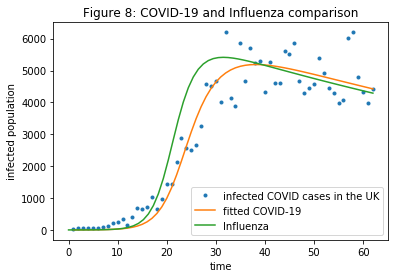

In [9]:
figure()
##SEIR model for COVID-19
def COVID_fit(t,B,Y):
    def COVID_SIER(x,t):
        S,E,I,R = x
        dS_dt = ((-B*I*S) / 6032 )
        dE_dt = ((B*I*S)/(6032)) - 1/5*E
        dI_dt = (1/5*E) - (Y*I)
        dR_dt = Y*I
        # returns the derivative of [S,E,I,R] 
        return np.array((dS_dt,dE_dt,dI_dt,dR_dt))
    
    solved_ode1 = odeint(COVID_SIER, (6028,4,0,0), t)
    return solved_ode1[:,2]
    
##fitting SEIR model to covid 19 data
p1,c1 = curve_fit(COVID_fit,data_x,infected_cases,p0=(0.5,0.1))

title('Figure 8: COVID-19 and Influenza comparison')
print(p1)

plot(data_x,infected_cases,'.',label = 'infected COVID cases in the UK')
plot(data_x,COVID_fit(data_x,*p1),label='fitted COVID-19')


##SEIR model for influenza using parameter from curvefit covid 19
B = p1[0] #fitted parameter from COVID_fit
Y = p1[1]
sigma=1/3
N=6032
solved_ode=solve_ivp(derivative_SEIR,(0,100),(6031,1,0,0),t_eval=np.linspace(0,62,62))
plot(solved_ode.t,solved_ode.y[2],label='Influenza')
ylabel('infected population')
xlabel('time')
legend()


### Report ###

#### Introduction ####

There are many different type of mathematical models such SIR,SIRD,SEIRD that can be used to understand the spreading of a disease over time and whether any measures taken can prevent an epidemic. I have coded the SIR and SEIR model and in this report, I am going to discuss my findings from them.

#### Method###
The SIR and SEIR model are based on solving a set of ODEs. I have used solve_ivp and odeint, both of which are in-built python tools to solve the ODEs. Throughout my code, I could have just used solve_ivp to solve the ODEs however, I found it easier to use odeint when I had to use curve_fit because with solve_ivp I could not keep track of the the dimension of the time array and found it rather confusing when implemented t_eval to generate a set of points as a result using cuve_fit kept giving errors of incorrect shape.The basic reproduction number has been derived from the ODEs and to see how close to the real value the SIR model can get, I fitted the SIR model to the COVID-19 data and found the best fit parameters ($\beta,\gamma$).Then using the equation, $\ r_0 =\beta/\gamma $, I calculated the basic reproduction number.
The rest of the code is just simply varying parameters and observing the differences. 

#### Results and analysis ####

The first step of the analysis was to plot a graph of the susceptible,infected and recovered population against time (Figure 1) to get an idea of the dynamics of the diesease with guessed parameters. Figure 1 shows the susceptible people who contracted the virus all recovered and the SEIR model shows a very similar graph so, at this point it has been establised that everybody who has contracted the virus will recover and I have not considered other possibilites therefore, I only care about the infected population,how they are effected with varying parameters and I have omitted the susceptible and recovered population graphs to make them less crowded and easier to interpret.

The next step was to see how varying $\beta$ effects the infected population. Figure 2 shows that with increasing $\beta$ the maximum number of infected people also increases at any one time which means to slow the spread of the disease the $\beta$ parameter needs to be low.This can be achieved by implementing lockdown or social distancing so that on average an infected person will not be able to infect many susceptible people. Additionally, I fitted the SIR model to the real data of COVID-19 to find an estimate for the parameters and compared it to the one calculated by experts and it turned out to be
$\ r_0$ = 0.356 which is really close to the one published in the news that is between 0.5 and 0.9.[7]

The incubation rate is given by (1/incubation period) where incubation period is the number of days in the exposed stage.
Then I looked at how changing the incubation rate ($\sigma$) changes the infected population in the SEIR model. My model assumes the incubation period is between 3 to 5 days. Figure(5-7) shows with increasing incubation period,the number of infectious population decreases compared to the exposed population until the peak in the infection curve is reached(after the peak there are more infectious people then exposed ones) because it takes longer to get infected which suggests the length of incubation period does not reduce the number of infections, given there is no vaccine.If there was vaccine then people could recover without becoming infectious which would flatten the infectious curve but in this case there is no vaccine therefore, the exposed people will eventually become infectious so, the infection curve will just peak at a later time which is indicated by the shifting graphs to the right.This means incubation period is not really reducing the number of infections, just delaying it.

Lastly, I modelled two different diseases, influenza and COVID-19 with different incubation periods but similar in nature as they both cause respiratory problems and spread through contact,coughing,sneezing etc. As seen earlier the incubation period does not play any significant role in reducing the infections,it simply delays the spread so, I only tried to find the $\beta$ and $\gamma$ parameter that works for both diseases. Comparing influenza to COVID-19 shows the graphs (figure 8) have similar shape so,fundamentally the dynamics of these 2 diseases is the same but influenza spreads faster than COVID-19.


#### Conclusion:####
In conclusion,lockdown and social distancing can help reduce the number of infected people;longer incubation period causes delayed infection given there is no vaccine.The SIR model's basic reprduction number is 0.356 which is quite close to the experts' value. The SIR model could be improved by making the population variable by including births and deaths and another compartment for vaccine.

### References:###

https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology [1]       
https://idmod.org/docs/general/model-seir.html [2]             
https://web.stanford.edu/~jhj1/teachingdocs/Jones-on-R0.pdf [3]           
https://www.idmod.org/docs/hiv/model-sir.html#sir-without-vital-dynamics [4]           
https://www.google.com/search?client=opera&hs=H1B&ei=4EWzXtv_MbKKlwSuvYfgDw&q=uk+covid+19+infected+cases+data&oq=uk+covid+19+infected+cases+data&gs_lcp=CgZwc3ktYWIQAzIFCCEQoAEyBQghEKABOgQIABBHOg4IABDqAhC0AhCaARDlAjoFCAAQkQI6BQgAEIMBOgIIADoECAAQQzoHCAAQgwEQQ1DHFFiGqgJgva4CaAFwAXgDgAHaBogBuTKSAQszLjkuOS41LTIuMpgBAKABAaoBB2d3cy13aXqwAQY&sclient=psy-ab&ved=2ahUKEwiO06ytuaDpAhWD3oUKHVn_AVkQyNoBKAR6BAgVEAs&uact=5&stick=H4sIAAAAAAAAAONgVuLVT9c3NMwySk6OL8zJecTYwMgt8PLHPWGp8klrTl5jLOQS901NyUzOzEt1ySxOTSxO9clPTizJzM8T0uNic80rySypFFLhEpRCNUeDQYqfC1VISI2LA65XiotHikM_V9_AvLg4GaiYiwvO49nFxO2RmphTkhFcklhSvIhVvjRbITm_LDNFwdBSITMvLTW5JDVFIRnolGKFlMSSRABoamSHxQAAAA&ictx=1 [5]        
https://stackoverflow.com/questions/55152516/differences-between-two-ode-solvers [6]        
https://www.telegraph.co.uk/global-health/science-and-disease/what-r-value-means-help-lift-coronavirus-lockdown-uk/ [7]   
https://www.who.int/emergencies/diseases/novel-coronavirus-2019/question-and-answers-hub/q-a-detail/q-a-similarities-and-differences-covid-19-and-influenza?gclid=EAIaIQobChMIp5_W0-ek6QIVL4BQBh3jsglYEAAYASAAEgKZtPD_BwE [8]
